<a href="https://colab.research.google.com/github/keces/Tilburg-University-BSc.-CSAI-Thesis/blob/main/THESIS_CNN_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os, shutil, pathlib
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.layers import BatchNormalization, Conv2D, MaxPool2D, Flatten, Dense, AveragePooling2D

## **Classification task** - Non-SR applied images



In [ ]:
#path where Non-SR, low resolution images exist in my Google Drive

import os, shutil, pathlib
new_base_dir = pathlib.Path("/content/drive/MyDrive/THESIS DOCS/subsampled")

In [ ]:
#Keras Sequential Model to implement CNN

model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.BatchNormalization())

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for malignant or 1 for benign 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#summary of the CNN architecture created

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 255, 255, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                        

In [ ]:
 model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(512, 512),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(512, 512),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(512, 512),
    batch_size=32)

Found 783 files belonging to 2 classes.
Found 615 files belonging to 2 classes.
Found 615 files belonging to 2 classes.


In [ ]:
#Running the CNN model

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)

Epoch 1/30
25/25 [==============================] - 95s 3s/step - loss: 15.4967 - accuracy: 0.8263 - val_loss: 167.0037 - val_accuracy: 0.2846
Epoch 2/30
25/25 [==============================] - 19s 653ms/step - loss: 5.5989 - accuracy: 0.9157 - val_loss: 255.3921 - val_accuracy: 0.2862
Epoch 3/30
25/25 [==============================] - 19s 666ms/step - loss: 6.7222 - accuracy: 0.8825 - val_loss: 88.0823 - val_accuracy: 0.2846
Epoch 4/30
25/25 [==============================] - 19s 663ms/step - loss: 1.7484 - accuracy: 0.9387 - val_loss: 13.4596 - val_accuracy: 0.4163
Epoch 5/30
25/25 [==============================] - 18s 651ms/step - loss: 1.1597 - accuracy: 0.9336 - val_loss: 66.2308 - val_accuracy: 0.3463
Epoch 6/30
25/25 [==============================] - 18s 654ms/step - loss: 0.4919 - accuracy: 0.9630 - val_loss: 18.4526 - val_accuracy: 0.6016
Epoch 7/30
25/25 [==============================] - 18s 652ms/step - loss: 0.4058 - accuracy: 0.9668 - val_loss: 14.6990 - val_accuracy:

In [ ]:
results = model.evaluate(test_dataset)

20/20 [==============================] - 54s 2s/step - loss: 65.8734 - accuracy: 0.7024


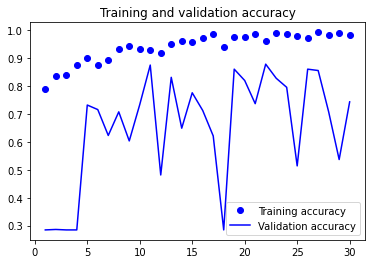

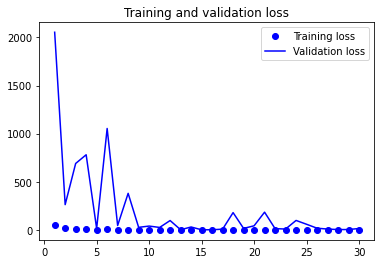

In [ ]:
#Plotting results

import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## **Classification task** - SR applied images

In [ ]:
#Path of the SR images in my Google Drive

new_base_dir_SR = pathlib.Path("/content/drive/MyDrive/THESIS DOCS/subsampled_SR")

In [ ]:
#Keras Sequential Model to implement CNN model

modelSR = keras.Sequential()

# Convolutional layer and maxpool layer 1
modelSR.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
modelSR.add(keras.layers.MaxPool2D(2,2))
modelSR.add(BatchNormalization())

# Convolutional layer and maxpool layer 2
modelSR.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
modelSR.add(keras.layers.MaxPool2D(2,2))
modelSR.add(BatchNormalization())

# Convolutional layer and maxpool layer 3
modelSR.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
modelSR.add(keras.layers.MaxPool2D(2,2))
modelSR.add(BatchNormalization())

# Convolutional layer and maxpool layer 4
modelSR.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
modelSR.add(keras.layers.MaxPool2D(2,2))
modelSR.add(BatchNormalization())

# This layer flattens the resulting image array to 1D array
modelSR.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
modelSR.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for malignant or 1 for benign 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
modelSR.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#Summary of the CNN model

modelSR.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 255, 255, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                      

In [ ]:
 modelSR.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset_SR = image_dataset_from_directory(
    new_base_dir_SR / "train",
    image_size=(512, 512),
    batch_size=32)
validation_dataset_SR = image_dataset_from_directory(
    new_base_dir_SR / "validation",
    image_size=(512, 512),
    batch_size=32)
test_dataset_SR = image_dataset_from_directory(
    new_base_dir_SR / "test",
    image_size=(512, 512),
    batch_size=32)

Found 793 files belonging to 2 classes.
Found 615 files belonging to 2 classes.
Found 615 files belonging to 2 classes.


In [ ]:
#Training the model

history2 = modelSR.fit(
    train_dataset_SR,
    epochs=30,
    validation_data=validation_dataset_SR)

Epoch 1/30
25/25 [==============================] - 169s 6s/step - loss: 15.7305 - accuracy: 0.7932 - val_loss: 5988.0752 - val_accuracy: 0.7154
Epoch 2/30
25/25 [==============================] - 17s 596ms/step - loss: 4.6705 - accuracy: 0.8373 - val_loss: 2962.6052 - val_accuracy: 0.7154
Epoch 3/30
25/25 [==============================] - 16s 585ms/step - loss: 0.7874 - accuracy: 0.9004 - val_loss: 4856.9316 - val_accuracy: 0.7154
Epoch 4/30
25/25 [==============================] - 16s 592ms/step - loss: 1.3551 - accuracy: 0.8916 - val_loss: 340.0916 - val_accuracy: 0.7350
Epoch 5/30
25/25 [==============================] - 17s 593ms/step - loss: 0.3992 - accuracy: 0.9168 - val_loss: 491.9940 - val_accuracy: 0.7220
Epoch 6/30
25/25 [==============================] - 16s 592ms/step - loss: 0.3657 - accuracy: 0.9344 - val_loss: 529.5827 - val_accuracy: 0.7285
Epoch 7/30
25/25 [==============================] - 16s 593ms/step - loss: 0.4788 - accuracy: 0.9142 - val_loss: 669.0690 - val_

In [ ]:
#Results of training the model on the test set

results2 = modelSR.evaluate(test_dataset_SR)

20/20 [==============================] - 83s 2s/step - loss: 277.5063 - accuracy: 0.8455


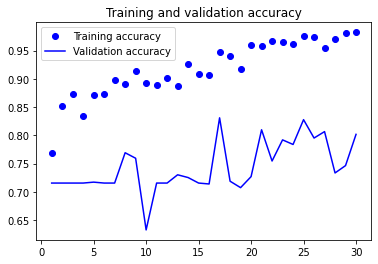

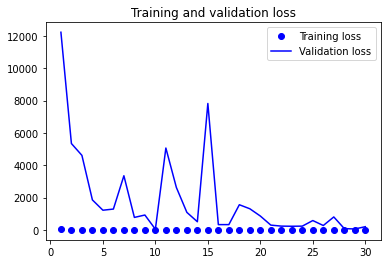

In [ ]:
#plotting the results of accuracy and loss

import matplotlib.pyplot as plt

accuracy = history2.history["accuracy"]
val_accuracy = history2.history["val_accuracy"]
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## **Classification task** - Non-SR applied directly 512x512 images. 

Not by downsampling images to 128x128 then upsampling to 512x512, but directly changing the size to 512x512 from 700x460. 



In [ ]:
#Path where the original HR images exist in my Google Drive

new_base_dir_or = pathlib.Path("/content/drive/MyDrive/THESIS DOCS/subsampled_originalres")

In [ ]:
#CNN model using Keras Sequential

model2 = keras.Sequential()

# Convolutional layer and maxpool layer 1
model2.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(512,512,3)))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(BatchNormalization())

# Convolutional layer and maxpool layer 2
model2.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(BatchNormalization())

# Convolutional layer and maxpool layer 3
model2.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(BatchNormalization())

# Convolutional layer and maxpool layer 4
model2.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(BatchNormalization())

# This layer flattens the resulting image array to 1D array
model2.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model2.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for malignant or 1 for benign 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
 model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset_or = image_dataset_from_directory(
    new_base_dir_or / "train",
    image_size=(512, 512),
    batch_size=32)
validation_dataset_or = image_dataset_from_directory(
    new_base_dir_or / "validation",
    image_size=(512, 512),
    batch_size=32)
test_dataset_or = image_dataset_from_directory(
    new_base_dir_or / "test",
    image_size=(512, 512),
    batch_size=32)

Found 783 files belonging to 2 classes.
Found 615 files belonging to 2 classes.
Found 615 files belonging to 2 classes.


In [ ]:
#Training the model 

history3 = model2.fit(
    train_dataset_or,
    epochs=30,
    validation_data=validation_dataset_or)

Epoch 1/30
25/25 [==============================] - 130s 4s/step - loss: 25.9817 - accuracy: 0.7650 - val_loss: 1660.6859 - val_accuracy: 0.2862
Epoch 2/30
25/25 [==============================] - 19s 682ms/step - loss: 4.1515 - accuracy: 0.8825 - val_loss: 1809.6189 - val_accuracy: 0.2911
Epoch 3/30
25/25 [==============================] - 19s 684ms/step - loss: 2.4733 - accuracy: 0.8493 - val_loss: 139.3852 - val_accuracy: 0.2862
Epoch 4/30
25/25 [==============================] - 19s 684ms/step - loss: 1.4750 - accuracy: 0.9221 - val_loss: 120.2693 - val_accuracy: 0.2911
Epoch 5/30
25/25 [==============================] - 20s 693ms/step - loss: 4.2273 - accuracy: 0.9132 - val_loss: 88.6558 - val_accuracy: 0.7366
Epoch 6/30
25/25 [==============================] - 19s 676ms/step - loss: 3.1933 - accuracy: 0.8927 - val_loss: 2.5340 - val_accuracy: 0.6146
Epoch 7/30
25/25 [==============================] - 19s 679ms/step - loss: 3.7801 - accuracy: 0.8736 - val_loss: 183.4399 - val_accu

In [ ]:
#Training the model on the test set

results3 = model2.evaluate(test_dataset_or)

20/20 [==============================] - 57s 2s/step - loss: 0.9386 - accuracy: 0.8520
